<a href="https://colab.research.google.com/github/sohomghosh/Data_Visualization_FDP/blob/main/CaseStudy_1_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
Link to download the dataset for case study 1: https://www.kaggle.com/burak3ergun/loan-data-set/version/1

# Notebook
This notebook is available for download at https://github.com/sohomghosh/Data_Visualization_FDP

# Documentations

**Matplotlib:**

*   https://matplotlib.org/stable/contents.html#
*   https://matplotlib.org/stable/tutorials/index.html
*   https://matplotlib.org/stable/gallery/index.html

**Seaborn:**

*   https://seaborn.pydata.org/
*   https://seaborn.pydata.org/tutorial.html
*   https://seaborn.pydata.org/examples/index.html

**Plotly:**
*   https://plotly.com/

**SHAP:**
*   https://github.com/slundberg/shap

**Scikit-learn:**
*   https://scikit-learn.org/stable/

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/sohomghosh/Data_Visualization_FDP/main/loan_data_set.csv')

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Some Useful Pandas Functions

In [6]:
df = data[['Dependents', 'Education', 'Self_Employed']].drop_duplicates().reset_index().copy()
df

,index,Dependents,Education,Self_Employed
0,0,0,Graduate,No
1,1,1,Graduate,No
2,2,0,Graduate,Yes
3,3,0,Not Graduate,No
4,5,2,Graduate,Yes
5,7,3+,Graduate,No
6,8,2,Graduate,No
7,11,2,Graduate,NaN
8,16,1,Not Graduate,No
9,19,0,Graduate,NaN


In [7]:
pd.isnull(df['Dependents']).value_counts()

False    23
True      4
Name: Dependents, dtype: int64

In [8]:
pd.isnull(df)#.value_counts()

,index,Dependents,Education,Self_Employed
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,True
8,False,False,False,False
9,False,False,False,True


In [9]:
new_df = df.drop(['index'],axis=1)
new_df

,Dependents,Education,Self_Employed
0,0,Graduate,No
1,1,Graduate,No
2,0,Graduate,Yes
3,0,Not Graduate,No
4,2,Graduate,Yes
5,3+,Graduate,No
6,2,Graduate,No
7,2,Graduate,NaN
8,1,Not Graduate,No
9,0,Graduate,NaN


In [10]:
new_df.fillna('')

,Dependents,Education,Self_Employed
0,0,Graduate,No
1,1,Graduate,No
2,0,Graduate,Yes
3,0,Not Graduate,No
4,2,Graduate,Yes
5,3+,Graduate,No
6,2,Graduate,No
7,2,Graduate,
8,1,Not Graduate,No
9,0,Graduate,


In [11]:
new_df.sort_values('Education', ascending = False)

,Dependents,Education,Self_Employed
13,0,Not Graduate,Yes
10,2,Not Graduate,No
25,1,Not Graduate,NaN
23,NaN,Not Graduate,No
21,1,Not Graduate,Yes
20,NaN,Not Graduate,Yes
19,0,Not Graduate,NaN
16,3+,Not Graduate,No
15,2,Not Graduate,Yes
14,3+,Not Graduate,Yes


In [12]:
#One-hot Encoding
one_hot_edu = pd.get_dummies(new_df['Education'])
one_hot_edu

,Graduate,Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [13]:
#adding columns side by side
concat_df = pd.concat([new_df, one_hot_edu],axis=1)
concat_df

,Dependents,Education,Self_Employed,Graduate,Not Graduate
0,0,Graduate,No,1,0
1,1,Graduate,No,1,0
2,0,Graduate,Yes,1,0
3,0,Not Graduate,No,0,1
4,2,Graduate,Yes,1,0
5,3+,Graduate,No,1,0
6,2,Graduate,No,1,0
7,2,Graduate,NaN,1,0
8,1,Not Graduate,No,0,1
9,0,Graduate,NaN,1,0


In [14]:
pivot_df = data.head(20).pivot(index='Loan_ID', columns='Dependents', values='Loan_Status').reset_index()
pivot_df

Dependents,Loan_ID,0,1,2,3+
0,LP001002,Y,NaN,NaN,NaN
1,LP001003,NaN,N,NaN,NaN
2,LP001005,Y,NaN,NaN,NaN
3,LP001006,Y,NaN,NaN,NaN
4,LP001008,Y,NaN,NaN,NaN
5,LP001011,NaN,NaN,Y,NaN
6,LP001013,Y,NaN,NaN,NaN
7,LP001014,NaN,NaN,NaN,N
8,LP001018,NaN,NaN,Y,NaN
9,LP001020,NaN,N,NaN,NaN


In [15]:
#join
data.merge(pivot_df, on='Loan_ID', how = 'inner')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,3+
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Y,NaN,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN,N,NaN,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Y,NaN,NaN,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Y,NaN,NaN,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Y,NaN,NaN,NaN
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,NaN,NaN,Y,NaN
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Y,NaN,NaN,NaN
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,NaN,NaN,NaN,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,NaN,NaN,Y,NaN
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,NaN,N,NaN,NaN


In [16]:
new_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
new_df['Dependents'].value_counts()

1     6
2     6
0     6
3+    5
Name: Dependents, dtype: int64

In [18]:
new_df['Dependents'].value_counts(normalize = True)

1     0.260870
2     0.260870
0     0.260870
3+    0.217391
Name: Dependents, dtype: float64

In [19]:
# Lambda functions with pandas
def clean_dependents(x):
  if x =='2' or x =='3+':
    x = '1+'
  return x
new_df['Dependents'].apply(lambda x : clean_dependents(x)).value_counts(normalize = True)


1+    0.478261
1     0.260870
0     0.260870
Name: Dependents, dtype: float64

# Univariate Analysis

In [20]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## For categorical data


### Bar Plots

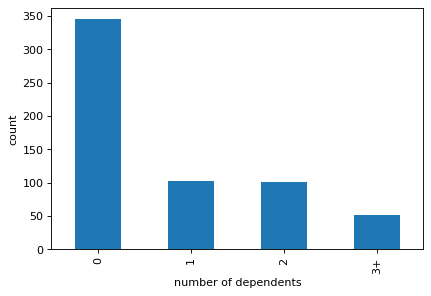

In [21]:
plt.figure(figsize=(6, 4), dpi=80)
plt.xlabel("number of dependents")
plt.ylabel("count")
data['Dependents'].value_counts().head(100).plot.bar() # For categorical data
plt.show()

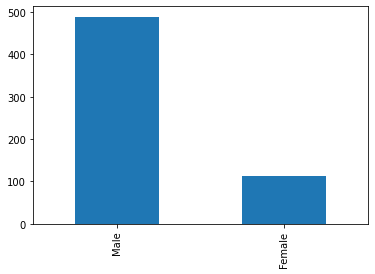

In [22]:
data['Gender'].value_counts().head(100).plot.bar()
plt.show()

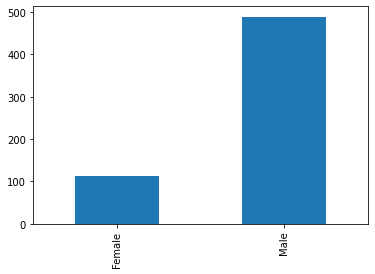

In [23]:
data['Gender'].value_counts().sort_index().head(100).plot.bar()
plt.show()

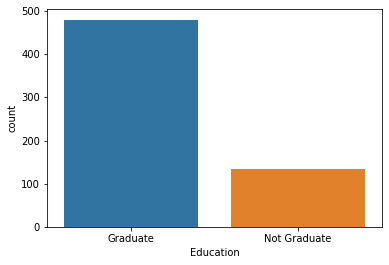

In [24]:
sns.countplot(data['Education'])
plt.show()

### Pie Chart

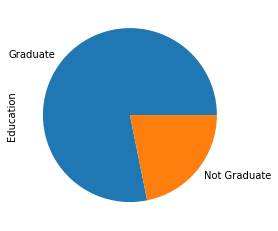

In [25]:
data['Education'].value_counts().head(10).plot.pie()
plt.gca().set_aspect('equal')
plt.show()

## For numeric data

### Histogram

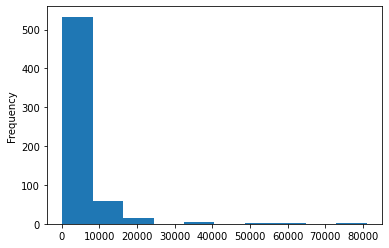

In [26]:
data['ApplicantIncome'].plot.hist(bins=10) # For numeric data
plt.show()

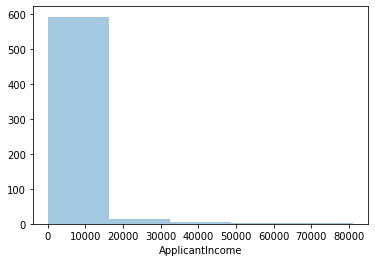

In [27]:
sns.distplot(data['ApplicantIncome'].dropna(), bins=5, kde=False) # For numeric data
plt.show()

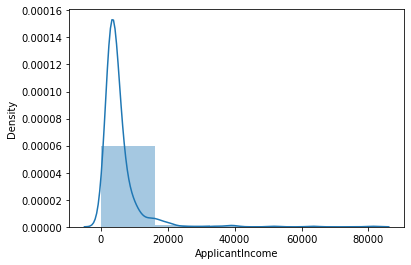

In [28]:
sns.distplot(data['ApplicantIncome'].dropna(), bins=5, kde=True) # For numeric data
plt.show()

# What is kde?
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

### Line Plot

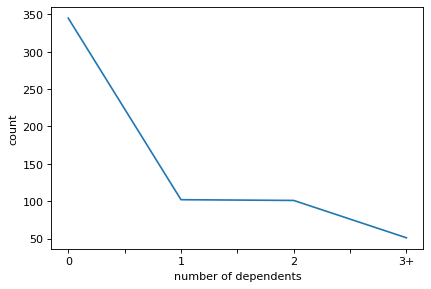

In [29]:
plt.figure(figsize=(6, 4), dpi=80)
plt.xlabel("number of dependents")
plt.ylabel("count")
data['Dependents'].value_counts().head(100).plot.line() # For categorical data
plt.show()

### Kernel Density Estimate Plot 

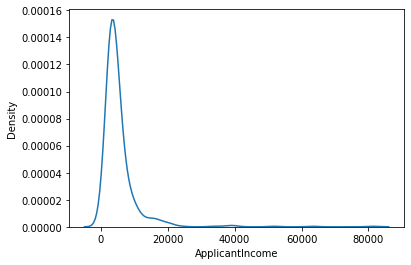

In [30]:
sns.kdeplot(data['ApplicantIncome'].dropna()) #does smoothing
plt.show()

### Box Plots

![](https://miro.medium.com/max/700/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

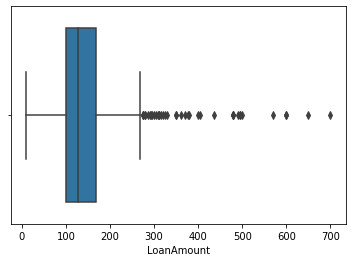

In [31]:
sns.boxplot(data=data, x = 'LoanAmount')
plt.show()

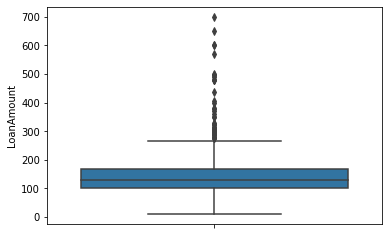

In [32]:
sns.boxplot(data=data, y = 'LoanAmount')
plt.show()

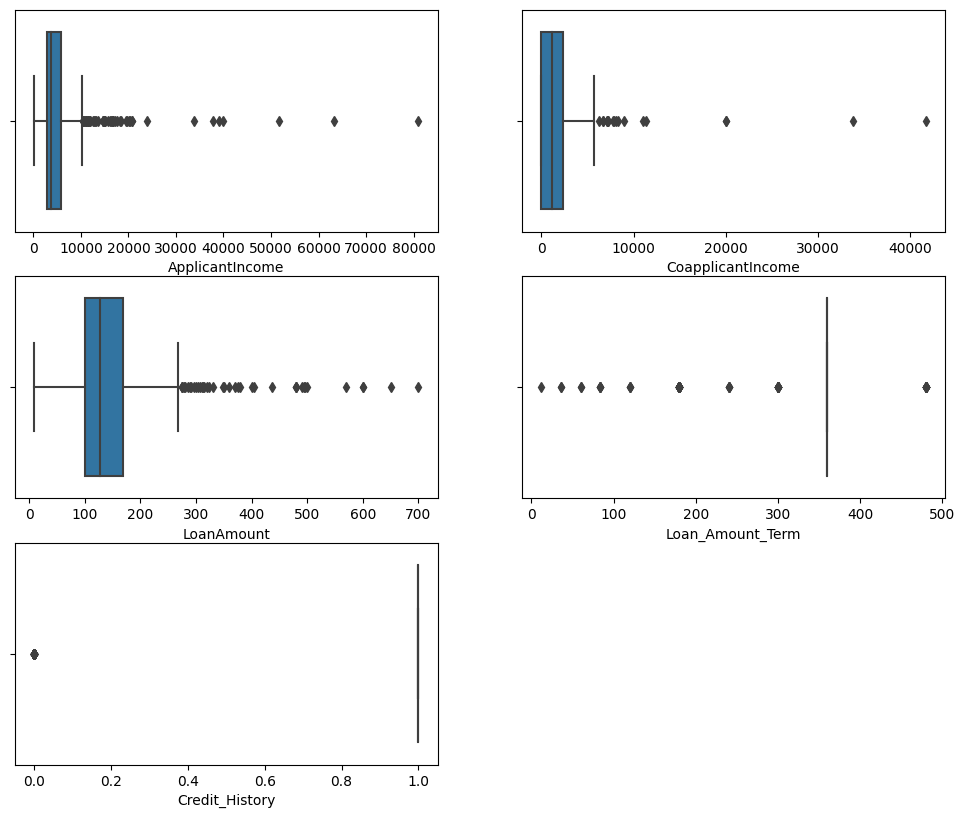

In [33]:
plt.figure(figsize = (12, 10), dpi=100)
features = ["ApplicantIncome",	"CoapplicantIncome",	"LoanAmount",	"Loan_Amount_Term",	"Credit_History"]
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = data)
plt.show()

# Bi-variate Analysis

## Scatter Plot

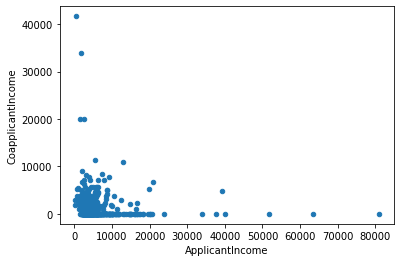

In [34]:
data.plot.scatter(x='ApplicantIncome', y='CoapplicantIncome')
plt.show()

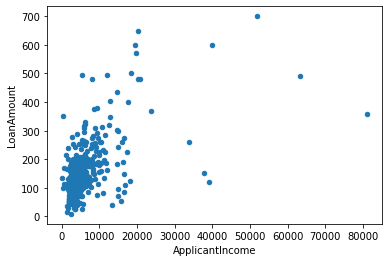

In [35]:
data.plot.scatter(x='ApplicantIncome', y='LoanAmount')
plt.show()

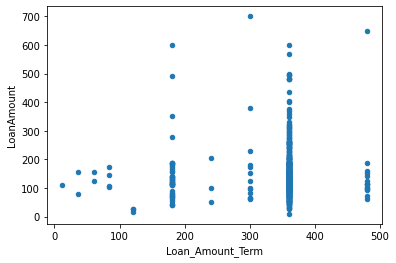

In [36]:
data.plot.scatter(x='Loan_Amount_Term', y='LoanAmount')
plt.show()

## Line Plot

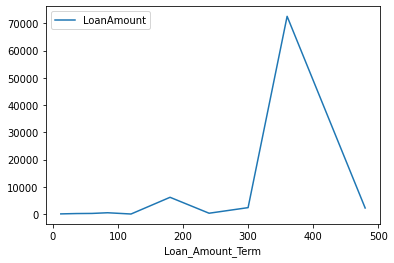

In [37]:
data.groupby('Loan_Amount_Term')['LoanAmount'].sum().reset_index().plot.line(x='Loan_Amount_Term', y='LoanAmount')
plt.show()

## Kernel Density Estimate Plot

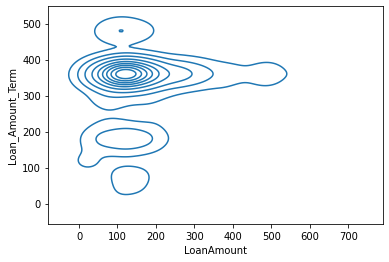

In [38]:
sns.kdeplot(data['LoanAmount'],data['Loan_Amount_Term'])
plt.show()

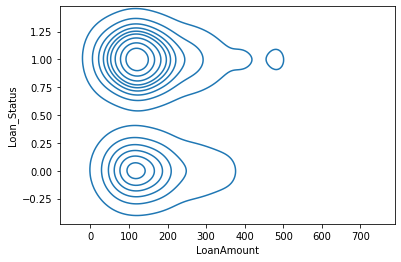

In [39]:
sns.kdeplot(data['LoanAmount'],data['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0))
plt.show()

## Hexplot

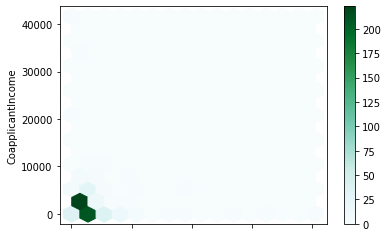

In [40]:
data.plot.hexbin(x='ApplicantIncome', y='CoapplicantIncome', gridsize=15)
#A hexplot aggregates points in space into hexagons, and then colorize those hexagons
plt.show()

## Jointplot
Combining scatter and hexplot 

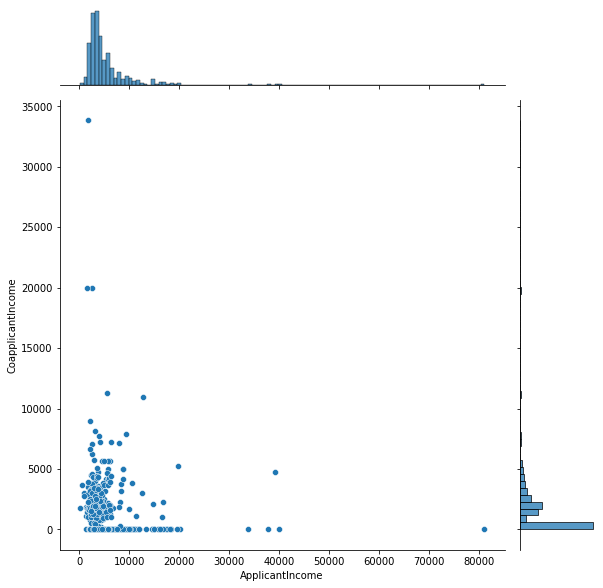

In [41]:
sns.jointplot(x='ApplicantIncome', y='CoapplicantIncome', data=data.dropna(), height=8.27)
plt.show()

## Stacked Plots

In [42]:
data_approve = data.groupby('Loan_Status').mean()[['ApplicantIncome', 'CoapplicantIncome']]

### Stacked Bar Plots

<Figure size 432x288 with 0 Axes>

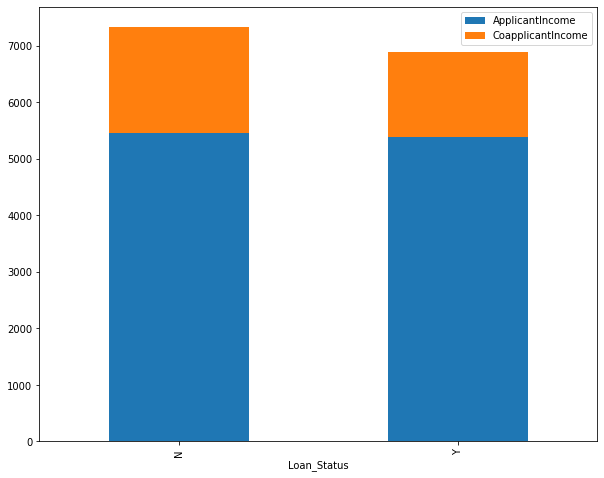

In [43]:
plt.clf()
data_approve.plot.bar(stacked=True,figsize=(10, 8))
plt.show()

### Stacked Area Plots

<Figure size 432x288 with 0 Axes>

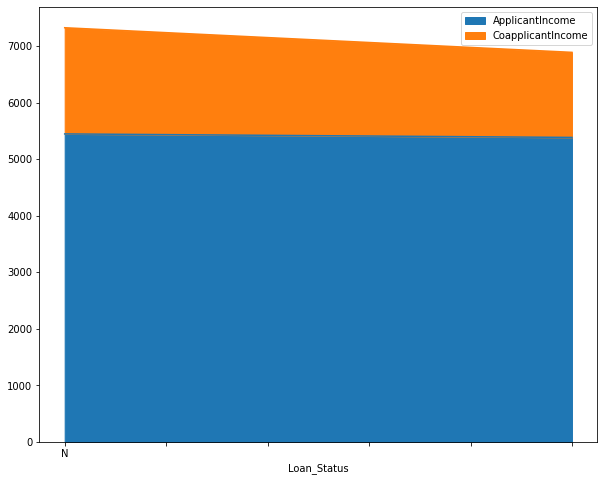

In [44]:
plt.clf()
data_approve.plot.area(stacked=True,figsize=(10, 8))
plt.show()

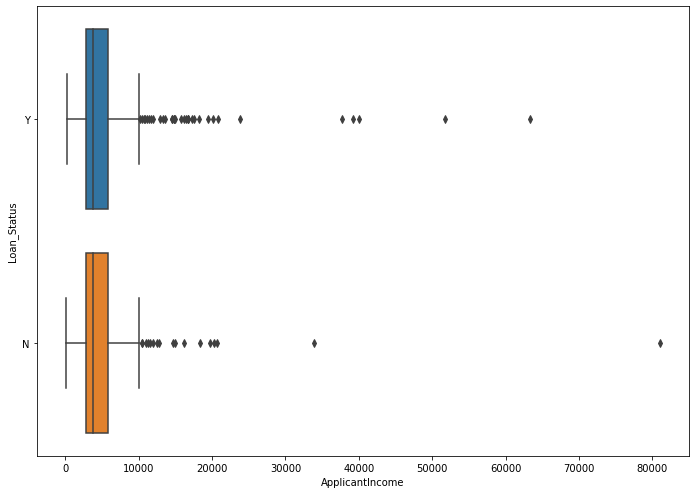

In [45]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.boxplot(x='ApplicantIncome', y='Loan_Status',data=data, ax=ax)
plt.show()

## Violin Plot

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.
Source: https://en.wikipedia.org/wiki/Violin_plot

![](https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png)

Source: https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png

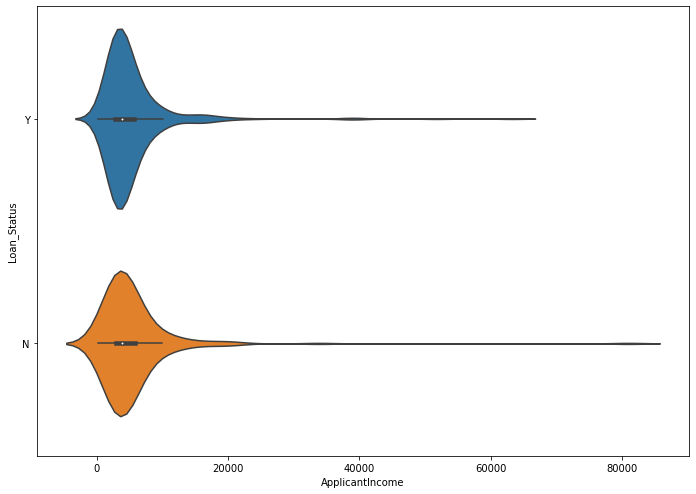

In [46]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.violinplot(x='ApplicantIncome', y='Loan_Status',data=data, ax=ax)
plt.show()

# Multi-variate Analysis

## Pairplots

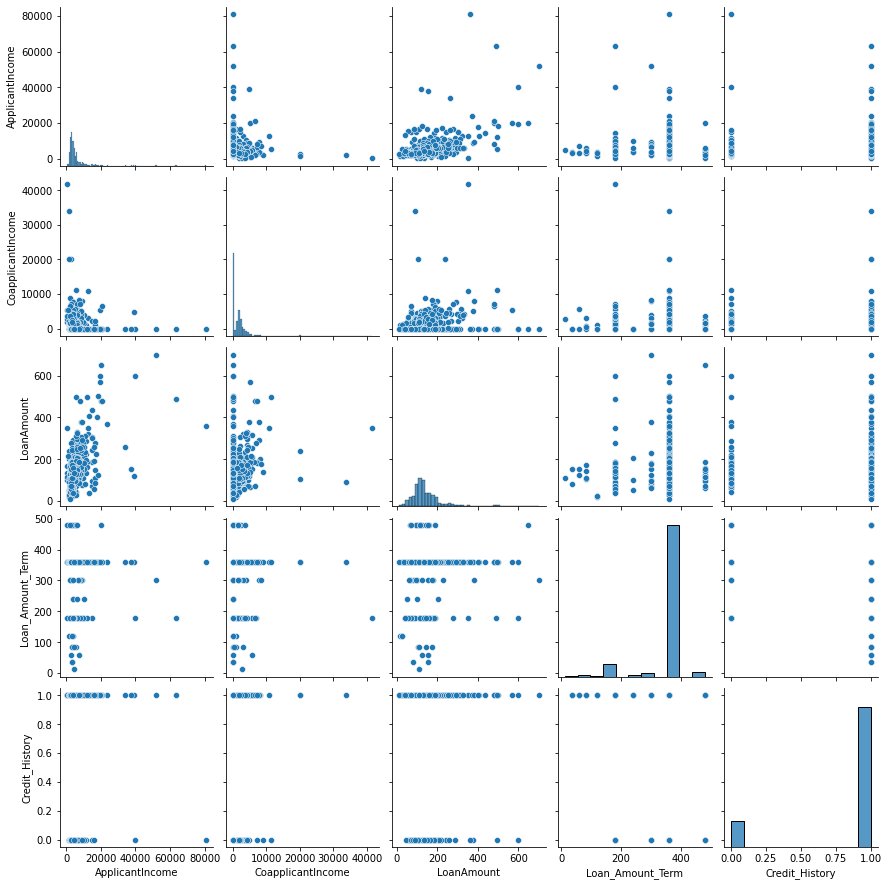

In [47]:
sns.pairplot(data)
plt.show()

## Facet Grid
A FacetGrid is an object which stores some information on how you want to break up your data visualization.

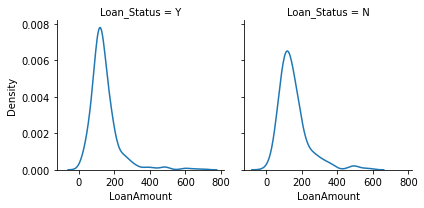

In [48]:
g = sns.FacetGrid(data, col="Loan_Status")
g.map(sns.kdeplot, "LoanAmount")
plt.show()

## Scatter Plots

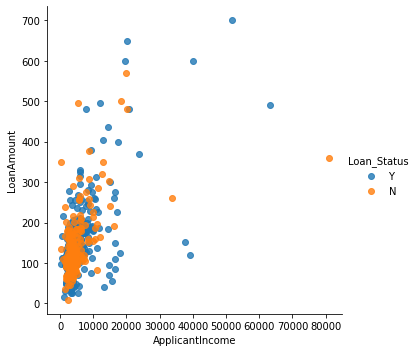

In [49]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data, fit_reg=False)
plt.show()

## Heatmap / Correlation Plot

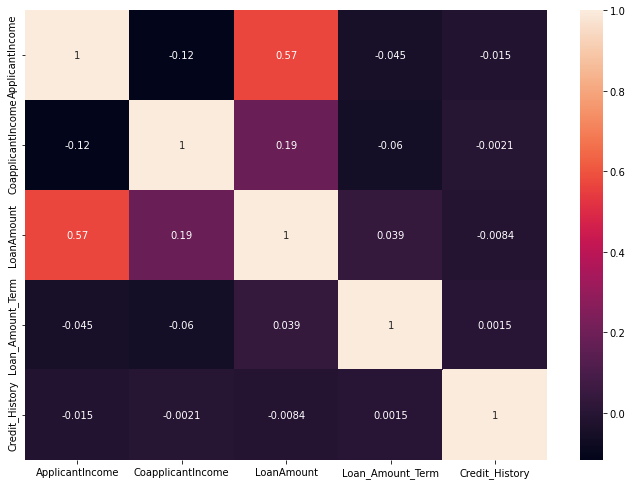

In [50]:
features = ["ApplicantIncome",	"CoapplicantIncome",	"LoanAmount",	"Loan_Amount_Term",	"Credit_History"]
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(data[features].corr(),annot=True, ax=ax)
plt.show()

## Factor Plots


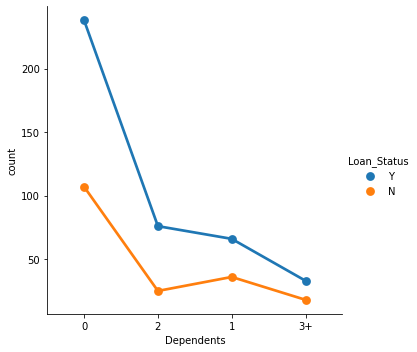

In [51]:
df = data[['Dependents', 'Loan_Status']].value_counts().reset_index().rename(columns = {'count':'Dependents', 0:'count'})
sns.factorplot(x='Dependents', y='count', hue='Loan_Status', data=df, fit_reg=False)
plt.show()

## 3D plots

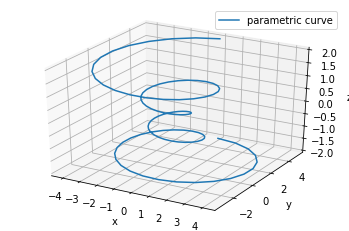

In [52]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d') #GCA is Get the current axes, creating one if necessary.
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.set_xlabel('x', linespacing=3.2)
ax.set_ylabel('y', linespacing=3.1)
ax.set_zlabel('z', linespacing=3.5)

ax.legend()

# Analysis

## Bar plots all in one

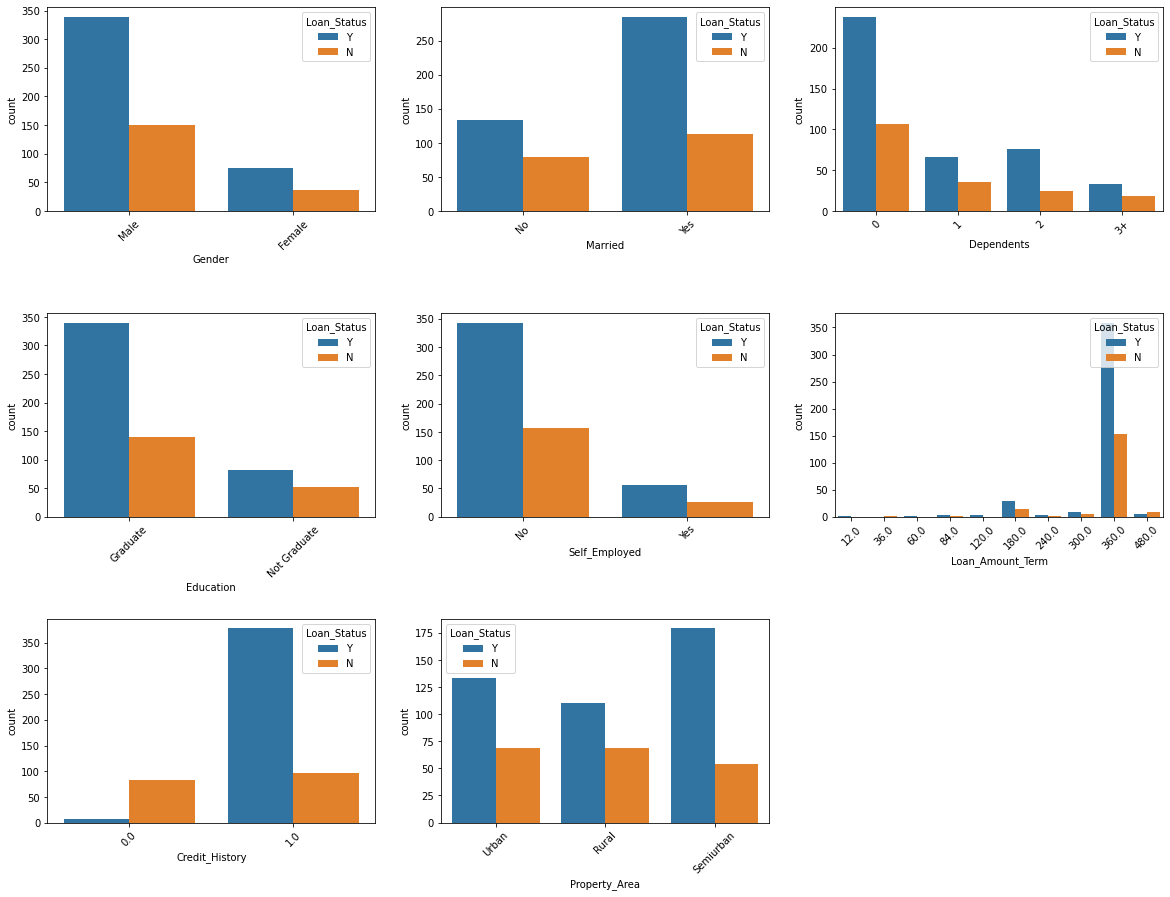

In [53]:
features = ["Gender",	"Married",	"Dependents",	"Education", "Self_Employed", "Loan_Amount_Term",	"Credit_History", "Property_Area"]
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(3, 3, i[0]+1) # NOTE: 3*3 = 9 (must be l<= number of elements in features)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'Loan_Status', data = data)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)

## Violin plots all in one

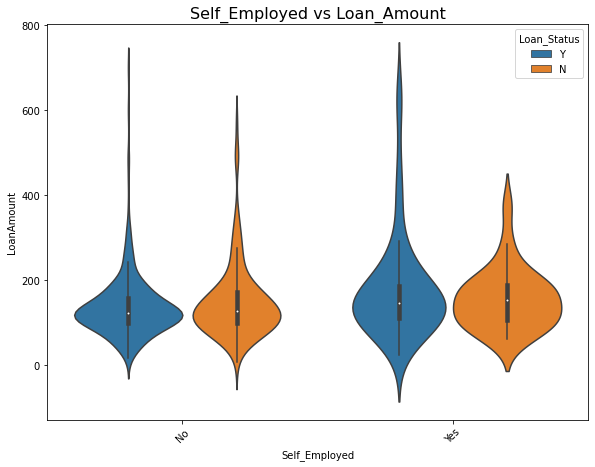

In [54]:
# Violin Plotting function
def violinplotting(data, columnx, columny, huename, title):
  plt.figure(figsize=(9.7, 7.27))
  plt.xticks(rotation=45)
  plt.title(title)
  sns.violinplot(data =data, x=columnx, y=columny, hue = huename)
  plt.show()
  
violinplotting(data, 'Self_Employed', 'LoanAmount', 'Loan_Status', 'Self_Employed vs Loan_Amount')

<Figure size 432x288 with 0 Axes>

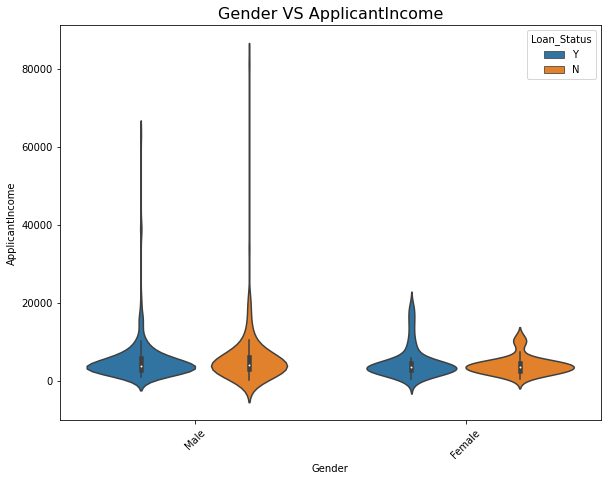

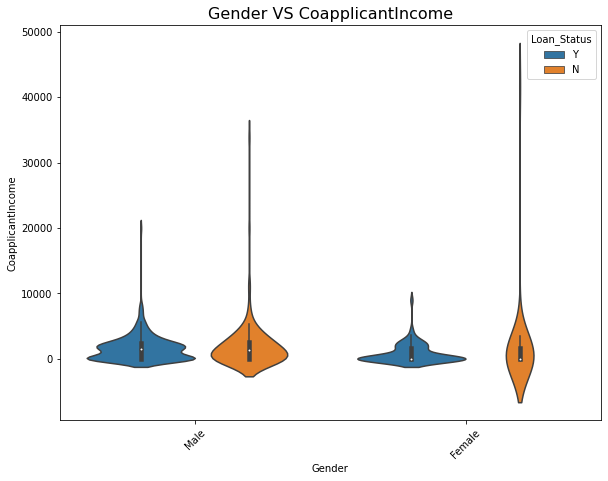

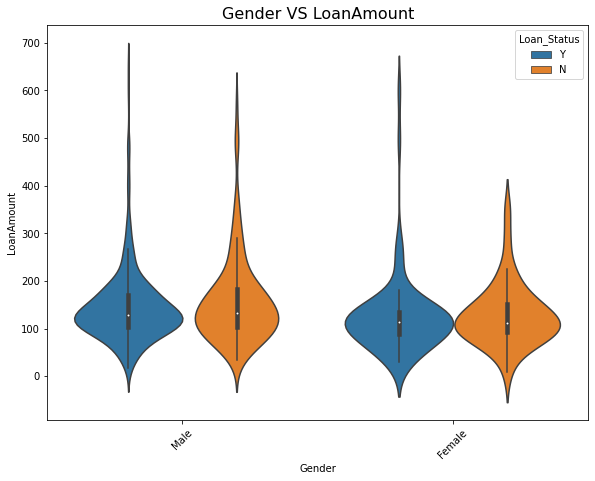

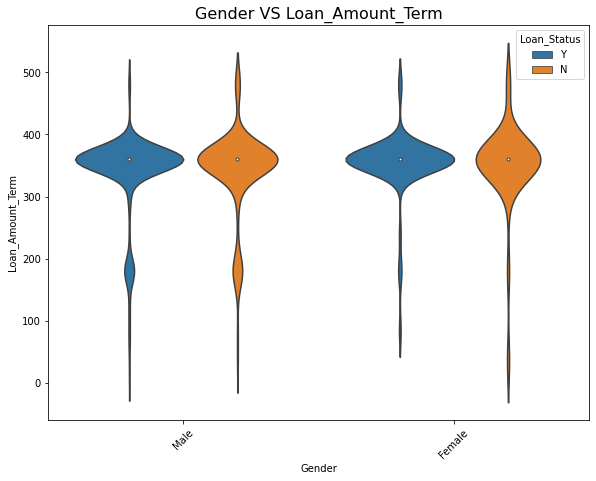

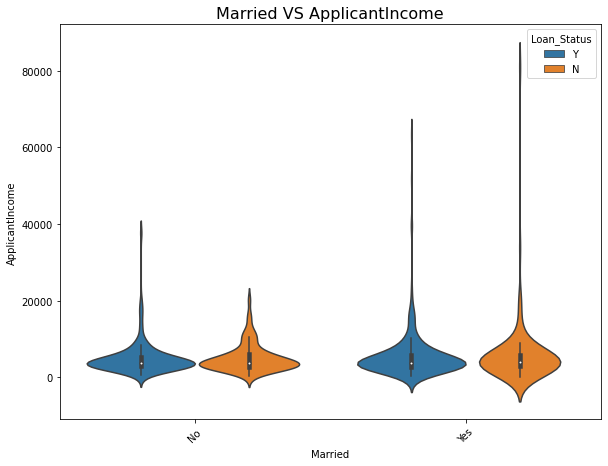

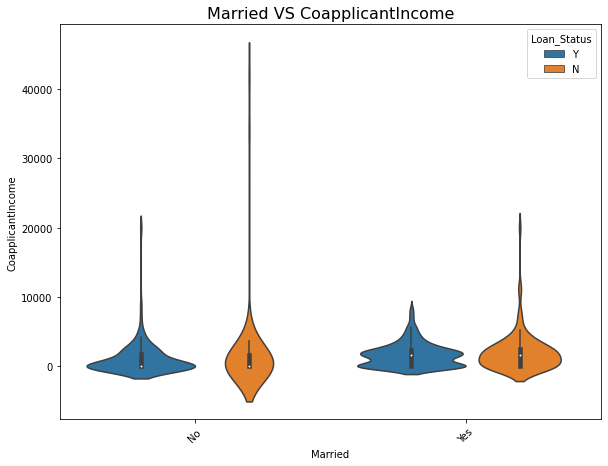

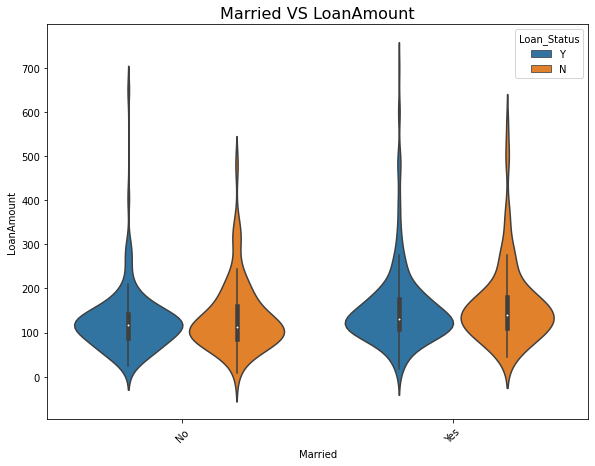

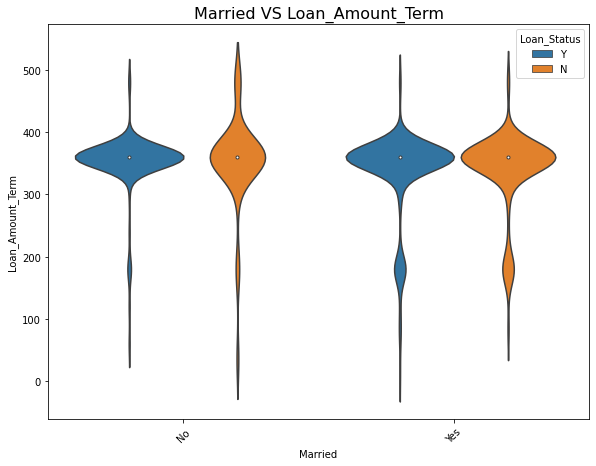

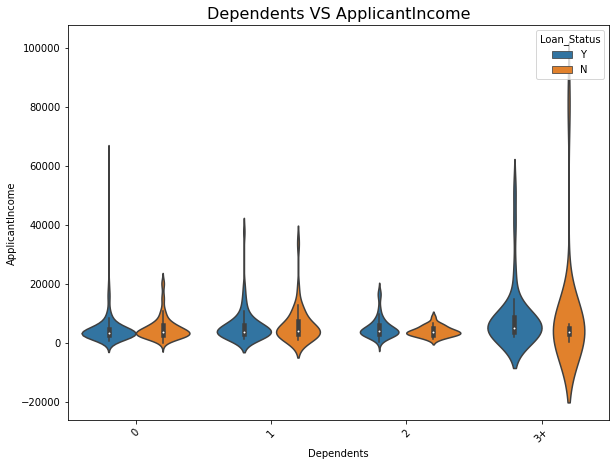

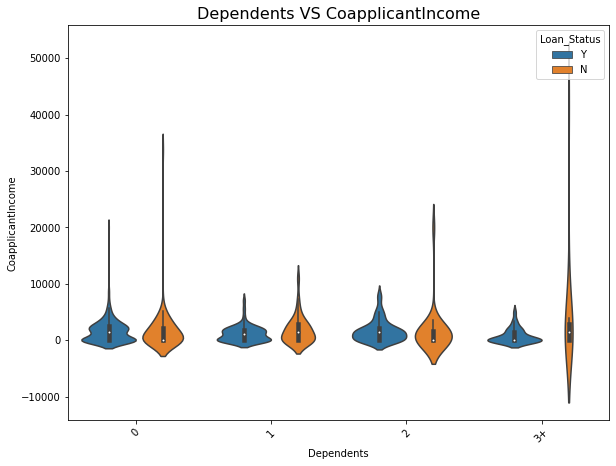

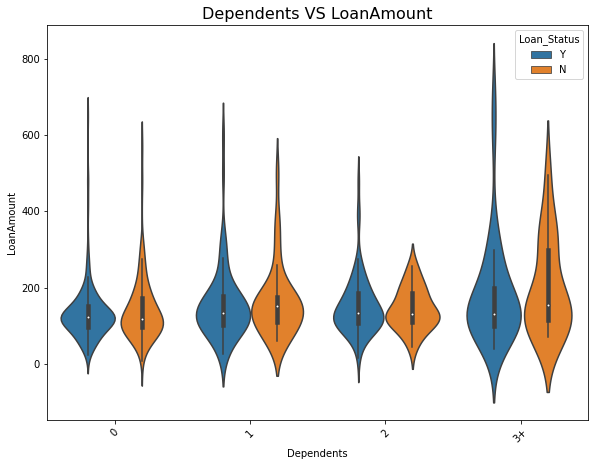

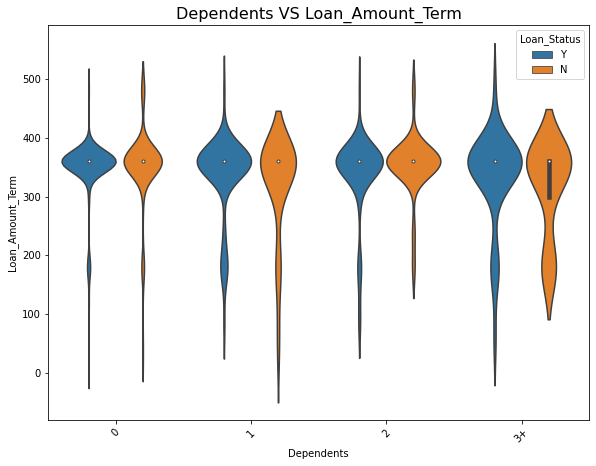

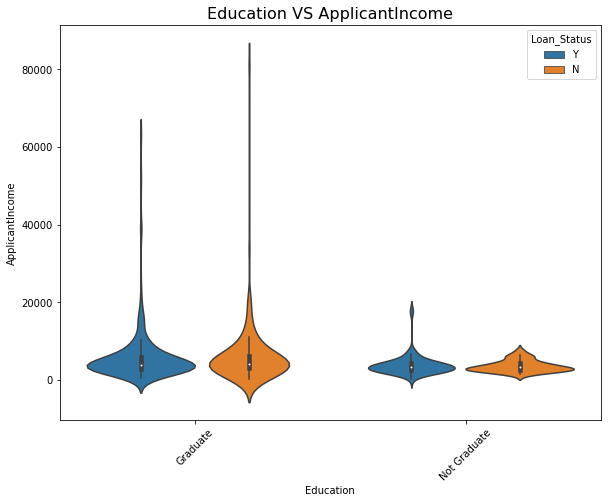

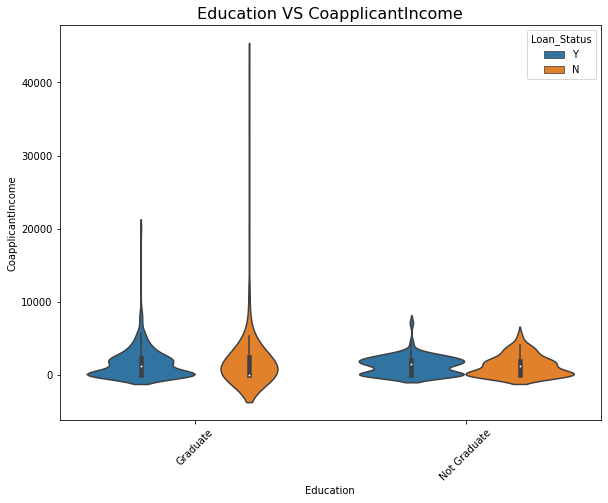

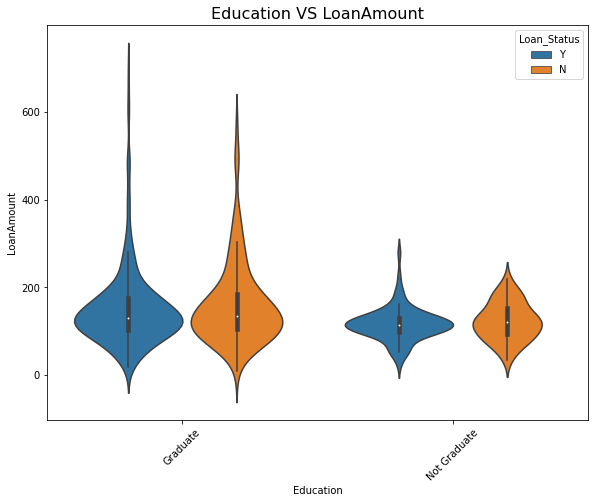

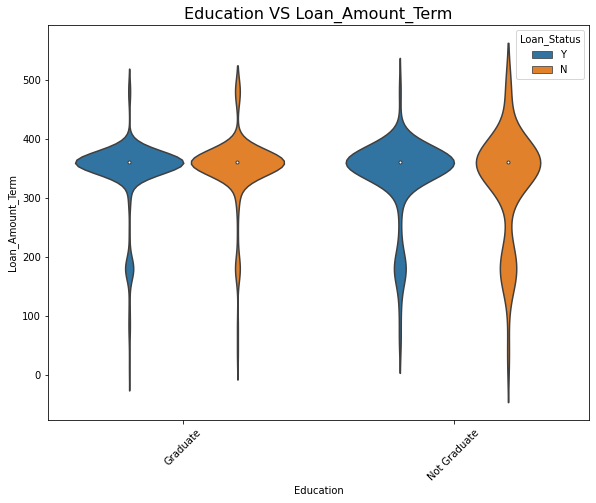

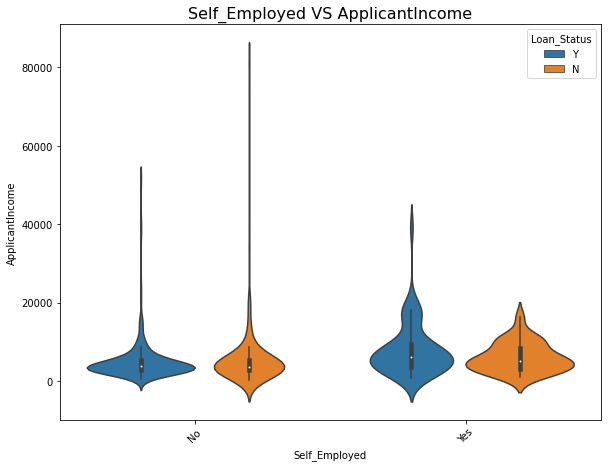

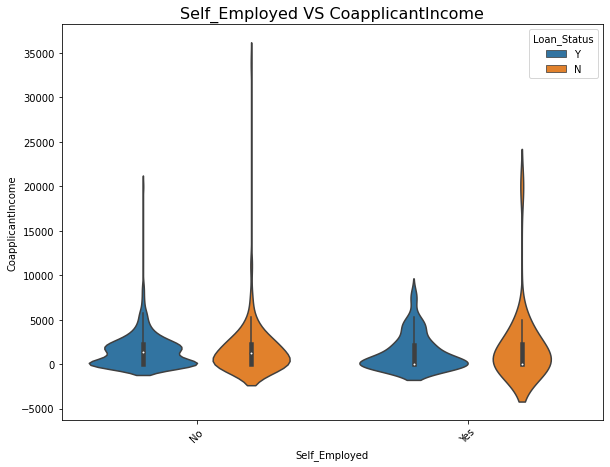

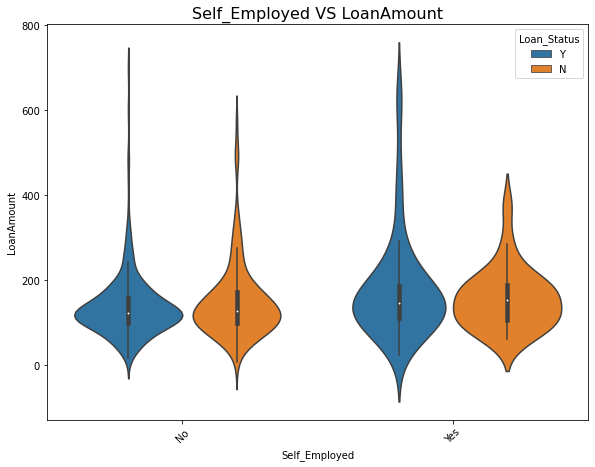

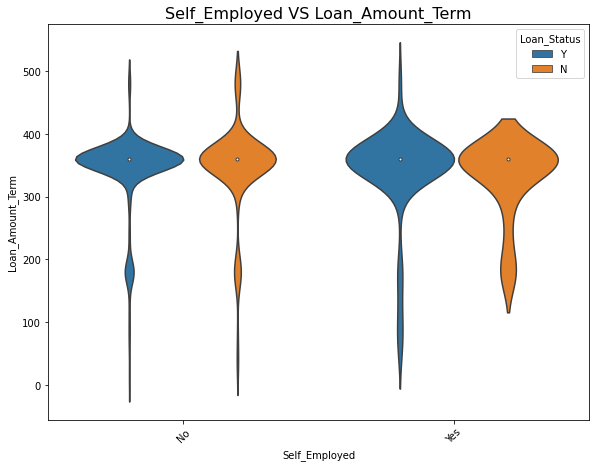

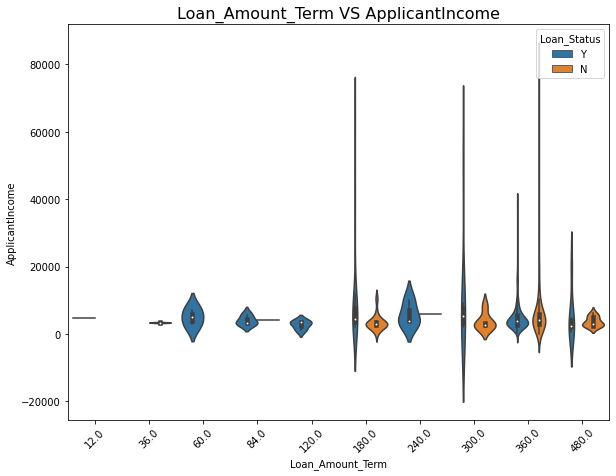

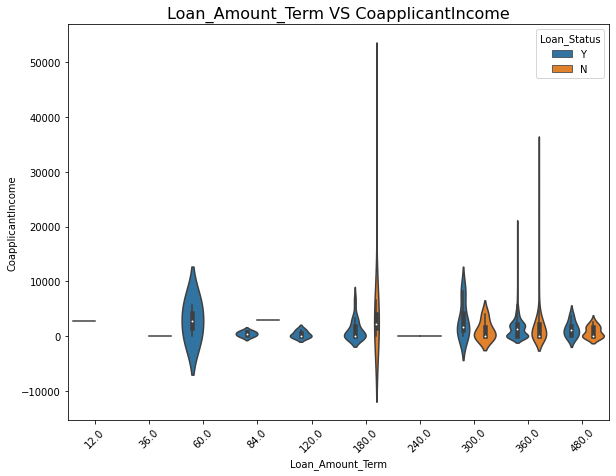

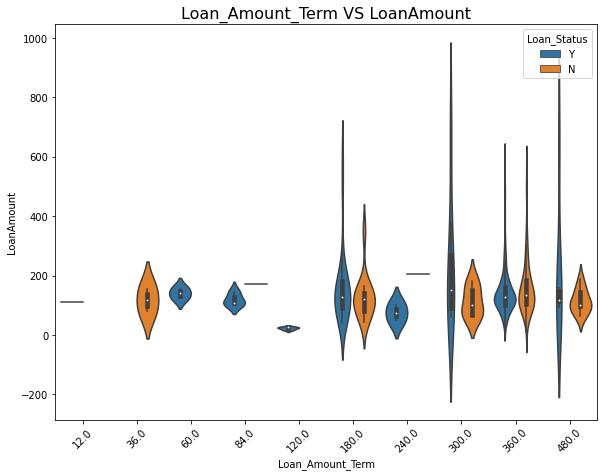

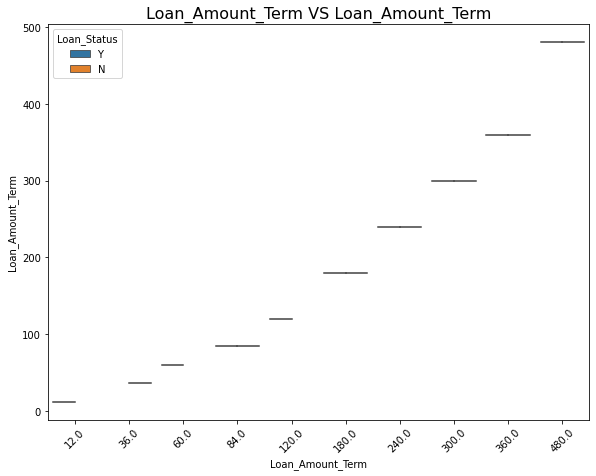

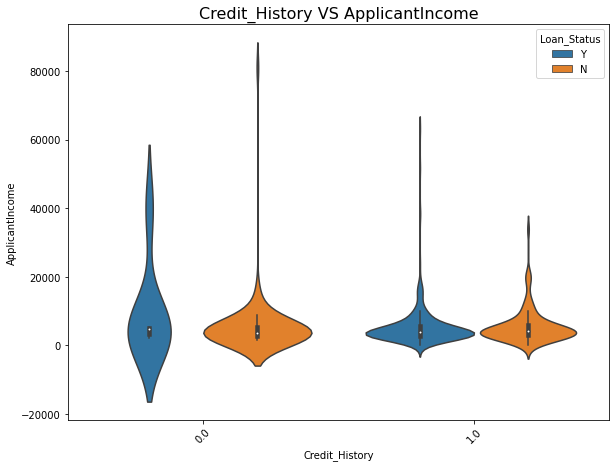

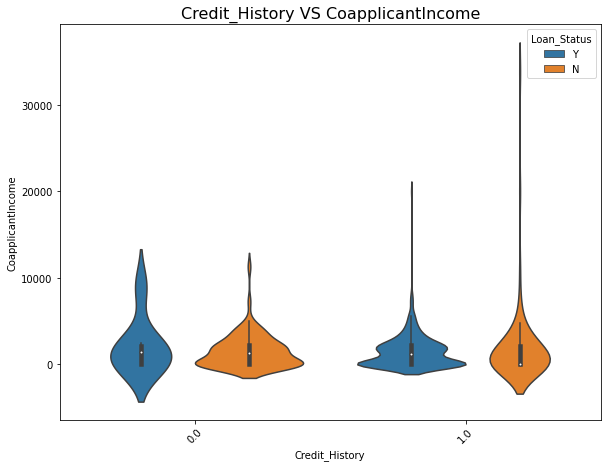

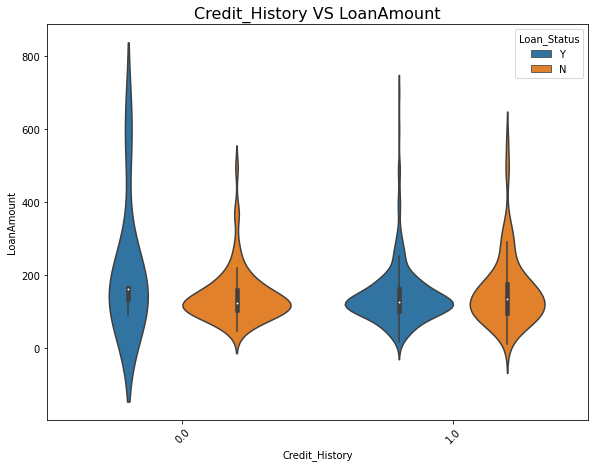

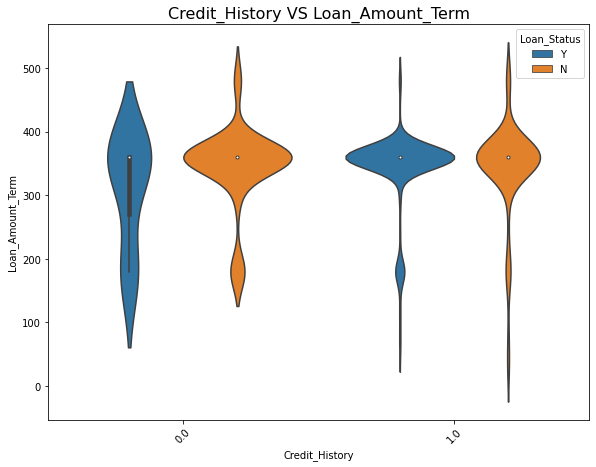

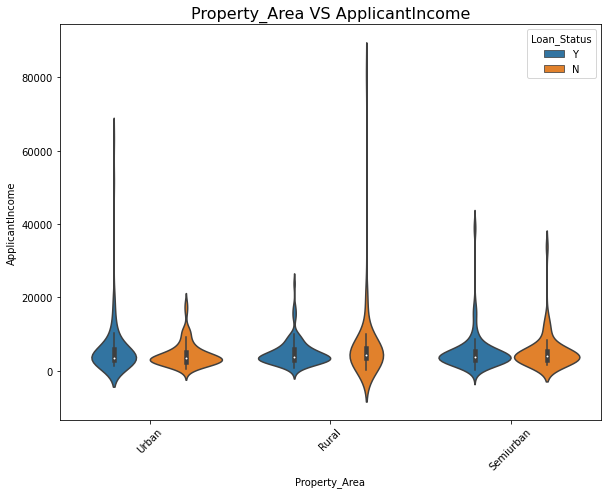

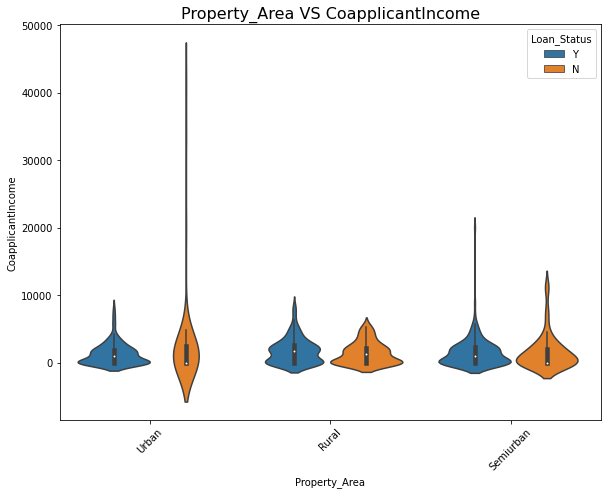

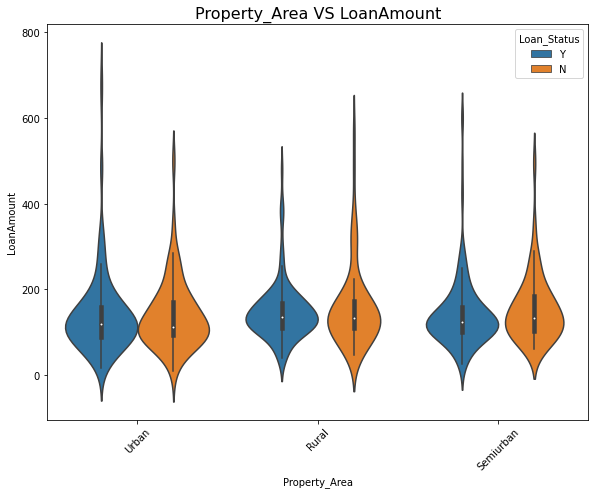

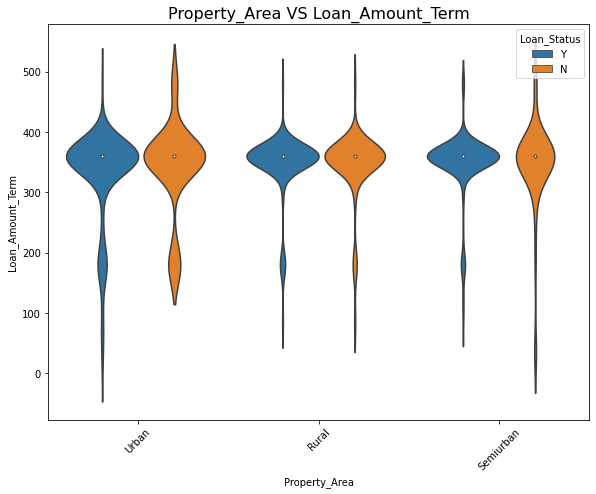

In [55]:
features_cat = ["Gender",	"Married",	"Dependents",	"Education", "Self_Employed", "Loan_Amount_Term",	"Credit_History", "Property_Area"]
features_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.clf()

for cat in enumerate(features_cat):
  for num in enumerate(features_num):
    violinplotting(data=data, columnx=cat[1], columny=num[1], huename='Loan_Status', title=cat[1]+" VS "+num[1])

# Others

## Styling/Aesthetics

### Adding colour

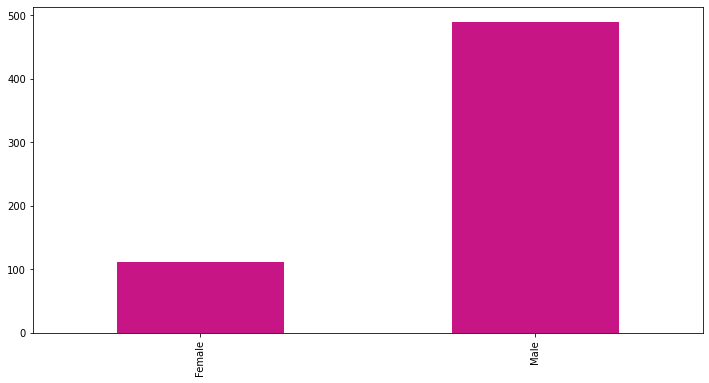

In [56]:
data['Gender'].value_counts().sort_index().head(100).plot.bar(figsize=(12, 6),color='mediumvioletred')
plt.show()

### Adding font size and title

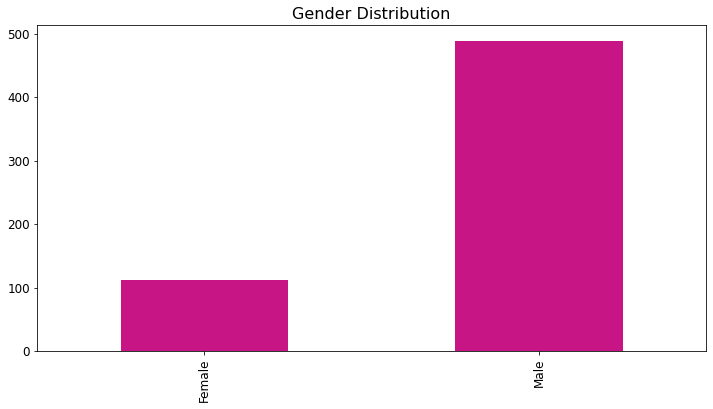

In [57]:
data['Gender'].value_counts().sort_index().head(100).plot.bar(figsize=(12, 6),color='mediumvioletred', fontsize=12, title='Gender Distribution')

Text(0.5, 1.0, 'Gender Distribution')

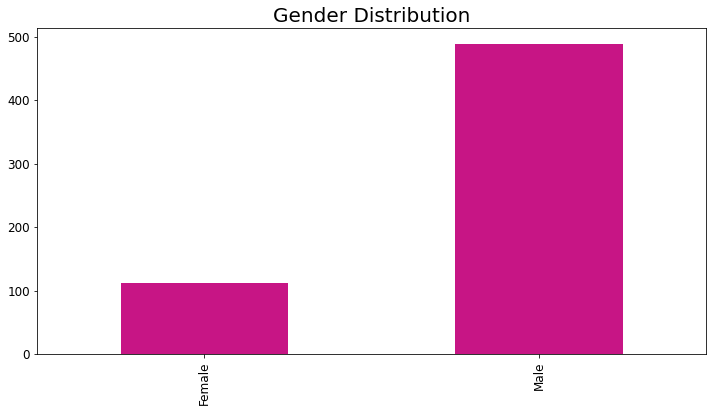

In [58]:
#Adding Title in bigger font
ax = data['Gender'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred', fontsize=12)
ax.set_title("Gender Distribution", fontsize=20)

## Overlaying one plot over other

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

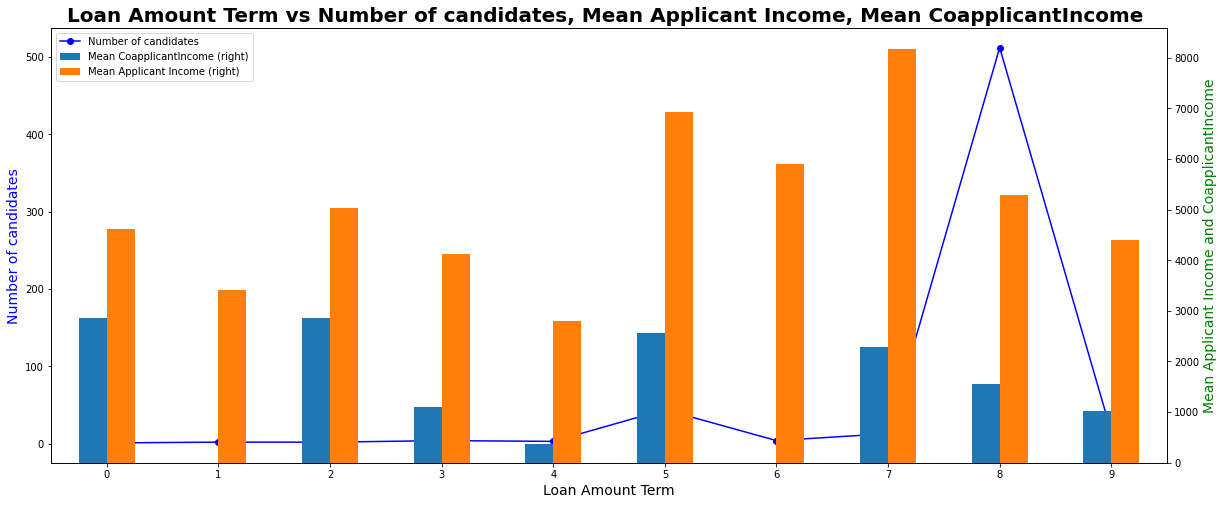

In [59]:
# get dataframe from crosstab function
ddf = data.groupby('Loan_Amount_Term').agg({'CoapplicantIncome':np.mean, 'ApplicantIncome':np.mean, 'Loan_ID':np.size}).reset_index().rename(columns = {'Loan_ID':'Number of candidates', 'CoapplicantIncome':'Mean CoapplicantIncome', 'ApplicantIncome': 'Mean Applicant Income'})

fig = plt.figure()
linePlot = ddf[['Number of candidates']]
barPlot =  ddf[['Mean CoapplicantIncome', 'Mean Applicant Income']]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
ax2 = barPlot.plot(kind='bar', ax = ax, rot=1, secondary_y=True, stacked=False)
ax.set_title('Loan Amount Term vs Number of candidates, Mean Applicant Income, Mean CoapplicantIncome ',fontsize=20,weight="bold")
ax.set_xlabel('Loan Amount Term',fontsize=14)
ax.set_ylabel('Number of candidates',color = 'b',fontsize=14)
ax2.set_ylabel('Mean Applicant Income and CoapplicantIncome',color = 'g',fontsize=14)
#ax.legend(loc = "upper left")
#ax2.legend(loc = "upper center")
fig.legend(loc="upper right")
plt.show()

## Training Machine Learning Models using Scikit Learn

In [60]:
from sklearn import model_selection, ensemble
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix,precision_recall_curve,auc, mean_squared_error

features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.dropna()[features], data.dropna()['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0), random_state=0)
classifier = ensemble.RandomForestClassifier()
#classifier.fit(X_train, y_train)

## Evaluation of Model Performance using Confusion Matrix and ROC Curve

In [61]:
def model(clf,train_X,train_y,test_X,test_y):
    clf.fit(train_X,train_y)  # fitting model
    #scoring data

    pred_tr=clf.predict(train_X)
    pred_test=clf.predict(test_X)
    fig, ax = plt.subplots(figsize=(8,6))
    print ('\nTraining Accuracy:{}'.format(accuracy_score(train_y,pred_tr)))
    print ('Training Confusion Matrix \n{}'.format(confusion_matrix(train_y,pred_tr)))
    print('Classification Report: \n{}'.format(classification_report(train_y,pred_tr)))
    pred_pr_tr=clf.predict_proba(train_X)[:,1]
    pred_pr_test=clf.predict_proba(test_X)[:,1]
    fpr,tpr,threshold=roc_curve(train_y,pred_pr_tr)
    ax.plot(fpr,tpr,label='Training AUC')
    print ('\nAUC:{}\n'.format(auc(fpr,tpr)))

    print ('\nTest Accuracy:{}'.format(accuracy_score(test_y,pred_test)))
    print ('Test Confusion Matrix \n{}'.format(confusion_matrix(test_y,pred_test)))
    print('Classification Report: \n{}'.format(classification_report(test_y,pred_test)))
    fpr,tpr,threshold=roc_curve(test_y,pred_pr_test)
    print ('\nAUC:{}\n'.format(auc(fpr,tpr)))
    ax.plot(fpr,tpr,label='Test AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()


Training Accuracy:1.0
Training Confusion Matrix 
[[106   0]
 [  0 254]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       254

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360


AUC:1.0


Test Accuracy:0.625
Test Confusion Matrix 
[[ 5 37]
 [ 8 70]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.38      0.12      0.18        42
           1       0.65      0.90      0.76        78

    accuracy                           0.62       120
   macro avg       0.52      0.51      0.47       120
weighted avg       0.56      0.62      0.56       120


AUC:0.5454822954822955



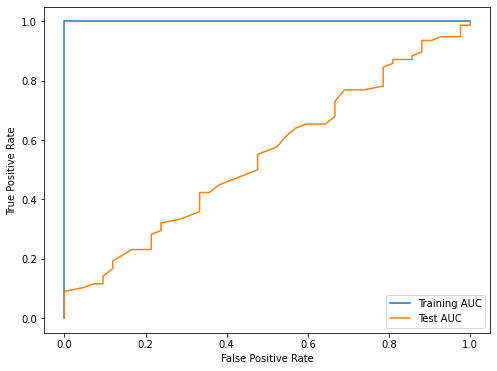

In [62]:
model(classifier,X_train,y_train,X_test,y_test)

## Model explainability plots

In [63]:
!pip install shap

     |████████████████████████████████| 564 kB 12.9 MB/s 


In [64]:
import shap
# Create object that can calculate shap values
explainer = shap.TreeExplainer(classifier)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

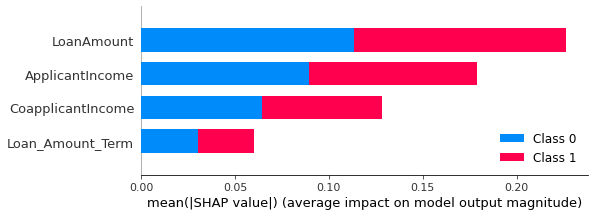

In [65]:
shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar")

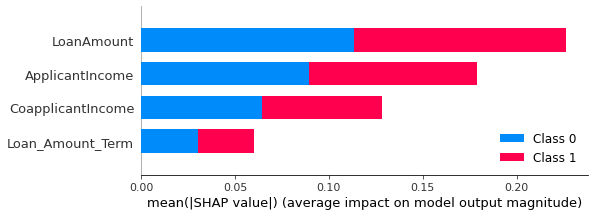

In [66]:
shap.summary_plot(shap_values, X_train, feature_names=features)

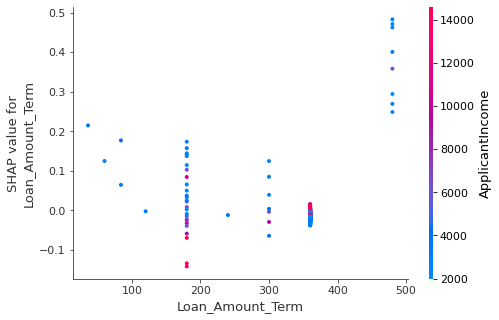

In [67]:
shap.dependence_plot(3, shap_values[0], X_train, feature_names=features)

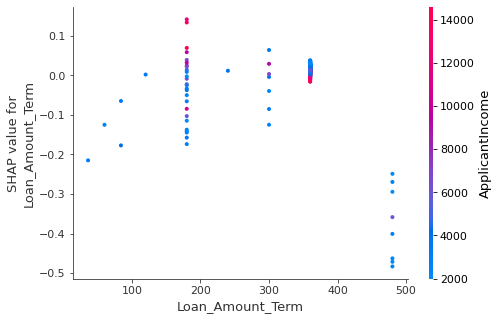

In [68]:
shap.dependence_plot(3, shap_values[1], X_train, feature_names=features)

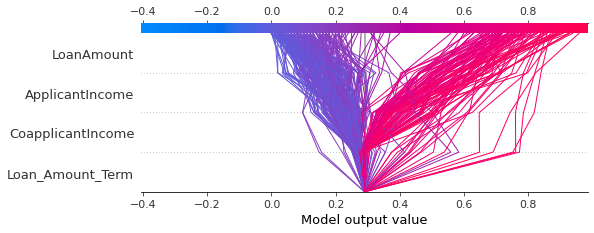

In [69]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features))

## Plotly

In [70]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as po

data_plt = dict(type = 'choropleth', 
locations = ['AL', 'AK', 'AR', 'CA'], 
locationmode = 'USA-states', 
z = [1,2,30,40,50], 
text = ['alabama', 'alaska', 'arizona', 'pugger', 'california'])
layout = dict(geo = {'scope':'usa'})


x = go.Figure(data = [data_plt] ,
layout = layout)
po.iplot(x)

x.show(renderer="colab")

# References
https://www.kaggle.com/santhraul/bank-loan-exploratory-data-analysis/notebook <br>
https://www.kaggle.com/ab9bhatia/complete-eda-for-loan-analysis/ <br>
https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html <br>
https://towardsdatascience.com/geographical-plotting-of-maps-with-plotly-4b5a5c95f02a <br>
https://towardsdatascience.com/explainable-ai-xai-with-shap-regression-problem-b2d63fdca670 <br>
https://github.com/slundberg/shap